# 用keras 训练一个神经网络

### 目标
- 使用tensorflow和keras来训练模型
### 数据集
- Digits: 10 分类手写数字
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [11]:
%matplotlib inline
#在本notebook中显示图片
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
#有1797张8乘8大小的图片
digits.images.shape

(1797, 8, 8)

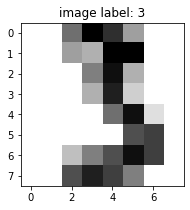

In [9]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

## Train/Test split
留一些数据来验证算法的泛化性能

In [13]:
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data,dtype=np.float32)
target = np.asarray(digits.target,dtype=np.int32)

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.15,random_state=20)

## Data Preprocess
能过对数据预处理，使所有输入数据处在同一尺度

In [15]:
from sklearn import preprocessing
#mean=0 standard deviation=1
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.mean_)
print(scaler.scale_)

[0.00000000e+00 3.16306483e-01 5.28880157e+00 1.18474132e+01
 1.18375900e+01 5.70268500e+00 1.30844794e+00 1.20497708e-01
 5.89390963e-03 2.06221349e+00 1.04184676e+01 1.19377865e+01
 1.02501637e+01 8.10150622e+00 1.81728880e+00 9.88867060e-02
 3.27439424e-03 2.64047151e+00 9.87557302e+00 6.98166339e+00
 7.18860511e+00 7.77406680e+00 1.84413883e+00 5.04256713e-02
 1.30975769e-03 2.45972495e+00 9.07138179e+00 8.84217420e+00
 9.97904388e+00 7.55926654e+00 2.35625409e+00 1.96463654e-03
 0.00000000e+00 2.32023576e+00 7.63326785e+00 9.03274394e+00
 1.02776686e+01 8.73280943e+00 2.86247544e+00 0.00000000e+00
 9.16830386e-03 1.59135560e+00 6.82711198e+00 7.23379175e+00
 7.62671906e+00 8.17943680e+00 3.40667976e+00 2.68500327e-02
 6.54878847e-03 7.00065488e-01 7.54878847e+00 9.56712508e+00
 9.35101506e+00 8.72757040e+00 3.77799607e+00 1.97118533e-01
 0.00000000e+00 2.86836935e-01 5.63457760e+00 1.20445318e+01
 1.17832351e+01 6.81008513e+00 2.14472823e+00 3.83104126e-01]
[1.         0.92630336 

显示一张经过预处理后的图来看

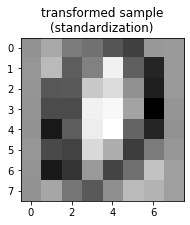

In [16]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

scaler可以反向操作，恢复到原来

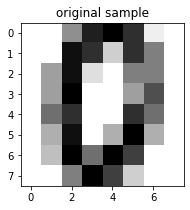

In [17]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [18]:
print(X_train.shape,y_train.shape)

(1527, 64) (1527,)


In [19]:
print(X_test.shape,y_test.shape)

(270, 64) (270,)


## Preprocess the target data
还需要对标签进行处理，将它编码成one-hot的开式

In [20]:
y_train[:3]

array([4, 0, 7], dtype=int32)

In [22]:
#keras提供了转换的api
from tensorflow.keras.utils import to_categorical

Y_train=to_categorical(y_train)
Y_train[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

## 用keras搭建Feedforward Neural Network

- 用`Keras` 构建并训练一个神经网络
    - https://www.tensorflow.org/guide/keras/overview
- 使用不同的优化算法、初始化方法、激活函数、网络层数来做实验（Experiments with different optimizers,initializations,activations and size of layers 
Experiment with different optimizers, activations, size of layers, initializations



### 使用keras高级api构建模型
- 通过堆叠layer构建网络
- 定义损失函数和优化算法
- feed model with data 来训练网络

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD

input_dim = X_train.shape[1]
hidden_dim=100
output_dim=10

model = Sequential([
    Dense(hidden_dim,input_dim=input_dim,activation="tanh"),
    Dense(output_dim,activation="softmax")
])

model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy",metrics=["accuracy"])

In [25]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=15,batch_size=32)

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 1s 572us/sample - loss: 0.9697 - accuracy: 0.7543 - val_loss: 0.4316 - val_accuracy: 0.9150
Epoch 2/15
1221/1221 [==============================] - 0s 61us/sample - loss: 0.3328 - accuracy: 0.9287 - val_loss: 0.2767 - val_accuracy: 0.9444
Epoch 3/15
1221/1221 [==============================] - 0s 94us/sample - loss: 0.2264 - accuracy: 0.9541 - val_loss: 0.1988 - val_accuracy: 0.9641
Epoch 4/15
1221/1221 [==============================] - 0s 98us/sample - loss: 0.1771 - accuracy: 0.9664 - val_loss: 0.1761 - val_accuracy: 0.9641
Epoch 5/15
1221/1221 [==============================] - 0s 101us/sample - loss: 0.1452 - accuracy: 0.9746 - val_loss: 0.1588 - val_accuracy: 0.9641
Epoch 6/15
1221/1221 [==============================] - 0s 98us/sample - loss: 0.1250 - accuracy: 0.9779 - val_loss: 0.1482 - val_accuracy: 0.9641
Epoch 7/15
1221/1221 [==============================] - 0s 101us/samp

### 查看训练结果

In [26]:
history.history

{'loss': [0.9696895429387041,
  0.33279134834720697,
  0.22635988889904318,
  0.17707091860204666,
  0.1452269182585479,
  0.12495933416971508,
  0.10980282952119638,
  0.09786553974709582,
  0.08823802012776275,
  0.08023971164817209,
  0.07324654804840135,
  0.06792114496560589,
  0.06273095264274209,
  0.05828069021084775,
  0.054510549638331865],
 'accuracy': [0.75429976,
  0.92874694,
  0.95413595,
  0.96642095,
  0.974611,
  0.977887,
  0.98280096,
  0.988534,
  0.987715,
  0.990991,
  0.992629,
  0.993448,
  0.993448,
  0.995086,
  0.995905],
 'val_loss': [0.4316010675788705,
  0.2766764386027467,
  0.19876952089515387,
  0.17614836484388588,
  0.15884678348217135,
  0.148228091498216,
  0.13663518302191316,
  0.13120633066674464,
  0.12209573826369118,
  0.11959585177353005,
  0.11619883415356182,
  0.11327453997302679,
  0.10981486129020554,
  0.11178031816981197,
  0.10993434048069069],
 'val_accuracy': [0.9150327,
  0.9444444,
  0.96405226,
  0.96405226,
  0.96405226,
  0.96

In [27]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

将训练结果转换成panda数据类型并画出来

In [28]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df["epoch"]=history.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.969690,0.754300,0.431601,0.915033,0
1,0.332791,0.928747,0.276676,0.944444,1
2,0.226360,0.954136,0.198770,0.964052,2
3,0.177071,0.966421,0.176148,0.964052,3
4,0.145227,0.974611,0.158847,0.964052,4
5,0.124959,0.977887,0.148228,0.964052,5
6,0.109803,0.982801,0.136635,0.967320,6
7,0.097866,0.988534,0.131206,0.967320,7
8,0.088238,0.987715,0.122096,0.967320,8
9,0.080240,0.990991,0.119596,0.964052,9


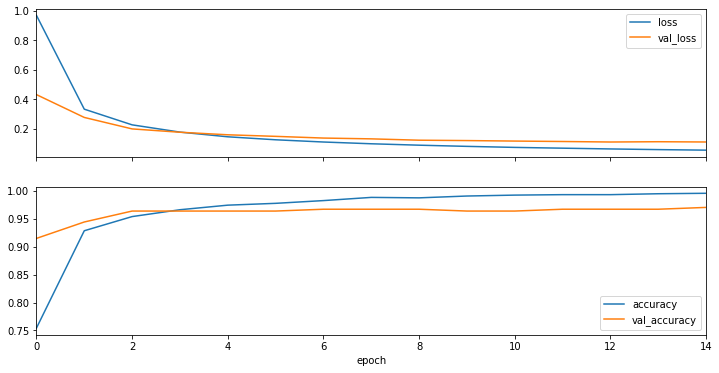

In [29]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### 使用Tensorboard记录训练

tensorboard是内置的tensorflow的官方工具

In [30]:
%load_ext tensorboard

In [32]:
!rm -rf tensorboard_logs

In [35]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,batch_size=32,
          callbacks=[tensorboard_callback]);

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 239us/sample - loss: 0.9385 - accuracy: 0.7592 - val_loss: 0.4219 - val_accuracy: 0.9150
Epoch 2/15
1221/1221 [==============================] - 0s 78us/sample - loss: 0.3136 - accuracy: 0.9451 - val_loss: 0.2747 - val_accuracy: 0.9444
Epoch 3/15
1221/1221 [==============================] - 0s 123us/sample - loss: 0.2153 - accuracy: 0.9574 - val_loss: 0.2143 - val_accuracy: 0.9608
Epoch 4/15
1221/1221 [==============================] - 0s 128us/sample - loss: 0.1682 - accuracy: 0.9681 - val_loss: 0.1871 - val_accuracy: 0.9575
Epoch 5/15
1221/1221 [==============================] - 0s 127us/sample - loss: 0.1406 - accuracy: 0.9730 - val_loss: 0.1646 - val_accuracy: 0.9608
Epoch 6/15
1221/1221 [==============================] - 0s 127us/sample - loss: 0.1203 - accuracy: 0.9803 - val_loss: 0.1515 - val_accuracy: 0.9608
Epoch 7/15
1221/1221 [==============================] - 0s 146us/s

In [36]:
#调用tensorboard
%tensorboard --logdir tensorboard_logs

### 实验一：不同优化器对算法的影响
- 调小学习率10或100倍
- 调大学习率（记录模型训练发散）
- 使SGD加上 Nesterov momentum of 0.9
SGD? 加问号可以显示帮助文档，相当于(help(SGD))
SGD<shift-tab> 在输入要查询的api后再按下shift+tab可以查看帮助文档

keras的api文档https://www.tensorflow.org/api_docs/python/tf/keras
或直接上keras官网查看


In [38]:
SGD?

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 227us/sample - loss: 2.2873 - accuracy: 0.1687 - val_loss: 2.2880 - val_accuracy: 0.1340
Epoch 2/15
1221/1221 [==============================] - 0s 56us/sample - loss: 2.2859 - accuracy: 0.1720 - val_loss: 2.2867 - val_accuracy: 0.1340
Epoch 3/15
1221/1221 [==============================] - 0s 77us/sample - loss: 2.2845 - accuracy: 0.1794 - val_loss: 2.2854 - val_accuracy: 0.1373
Epoch 4/15
1221/1221 [==============================] - 0s 89us/sample - loss: 2.2831 - accuracy: 0.1835 - val_loss: 2.2840 - val_accuracy: 0.1438
Epoch 5/15
1221/1221 [==============================] - 0s 99us/sample - loss: 2.2817 - accuracy: 0.1884 - val_loss: 2.2827 - val_accuracy: 0.1471
Epoch 6/15
1221/1221 [==============================] - 0s 107us/sample - loss: 2.2802 - accuracy: 0.1957 - val_loss: 2.2813 - val_accuracy: 0.1503
Epoch 7/15
1221/1221 [==============================] - 0s 123us/samp

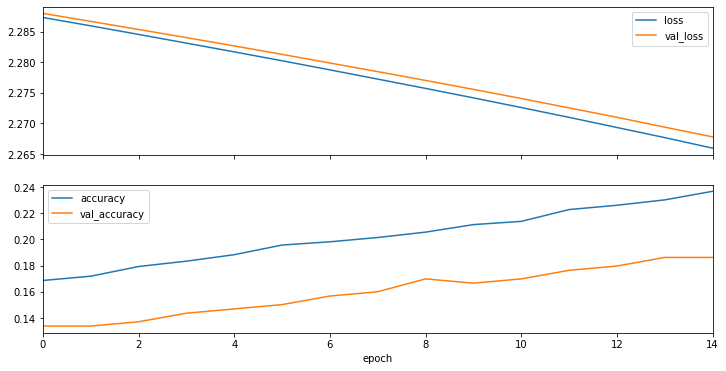

In [43]:
#改小学习率 0.001。分析：会收敛很慢
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim,
                activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
model.add(Activation("softmax"))

optimizer = SGD(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=15, batch_size=32)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 228us/sample - loss: 1.7026 - accuracy: 0.7617 - val_loss: 1.9520 - val_accuracy: 0.5065
Epoch 2/15
1221/1221 [==============================] - 0s 59us/sample - loss: 1.5669 - accuracy: 0.8943 - val_loss: 1.5387 - val_accuracy: 0.9281
Epoch 3/15
1221/1221 [==============================] - 0s 70us/sample - loss: 1.5139 - accuracy: 0.9500 - val_loss: 1.5286 - val_accuracy: 0.9379
Epoch 4/15
1221/1221 [==============================] - 0s 79us/sample - loss: 1.4991 - accuracy: 0.9640 - val_loss: 1.6736 - val_accuracy: 0.7810
Epoch 5/15
1221/1221 [==============================] - 0s 82us/sample - loss: 1.5457 - accuracy: 0.9181 - val_loss: 1.4956 - val_accuracy: 0.9673
Epoch 6/15
1221/1221 [==============================] - 0s 120us/sample - loss: 1.4872 - accuracy: 0.9746 - val_loss: 1.5001 - val_accuracy: 0.9673
Epoch 7/15
1221/1221 [==============================] - 0s 120us/samp

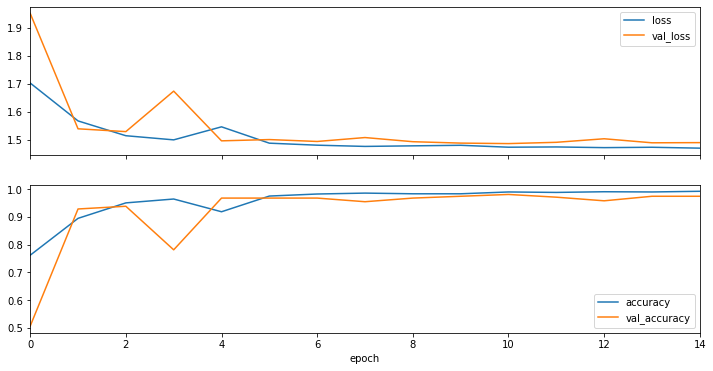

In [46]:
#改大学习率 10。分析：模型在局部最优处反复,训练损失值会比较大
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim,
                activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
model.add(Activation("softmax"))

optimizer = SGD(lr=10)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=15, batch_size=32)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 235us/sample - loss: 1.9252 - accuracy: 0.5946 - val_loss: 1.6523 - val_accuracy: 0.8137
Epoch 2/15
1221/1221 [==============================] - 0s 56us/sample - loss: 1.5720 - accuracy: 0.9222 - val_loss: 1.5479 - val_accuracy: 0.9346
Epoch 3/15
1221/1221 [==============================] - 0s 56us/sample - loss: 1.5193 - accuracy: 0.9648 - val_loss: 1.5266 - val_accuracy: 0.9477
Epoch 4/15
1221/1221 [==============================] - 0s 71us/sample - loss: 1.5028 - accuracy: 0.9779 - val_loss: 1.5084 - val_accuracy: 0.9608
Epoch 5/15
1221/1221 [==============================] - 0s 76us/sample - loss: 1.4935 - accuracy: 0.9812 - val_loss: 1.5066 - val_accuracy: 0.9641
Epoch 6/15
1221/1221 [==============================] - 0s 100us/sample - loss: 1.4876 - accuracy: 0.9861 - val_loss: 1.5061 - val_accuracy: 0.9608
Epoch 7/15
1221/1221 [==============================] - 0s 117us/samp

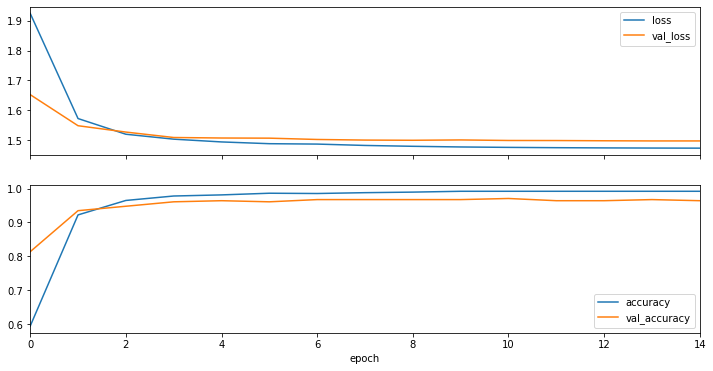

In [40]:
#使用momentum 分析：缓解学习率小，训练慢的问题 
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim,
                activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
model.add(Activation("softmax"))

optimizer = SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=15, batch_size=32)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### 实验二 改变优化算法：
- 使用Adam替代SGD,并使用Adam的默认参数
- 填加另一层隐藏层，并改所有激活函数为RELU

In [47]:
from tensorflow.keras.optimizers import Adam

Train on 1221 samples, validate on 306 samples
Epoch 1/15
1221/1221 [==============================] - 0s 267us/sample - loss: 1.5497 - accuracy: 0.6093 - val_loss: 0.8136 - val_accuracy: 0.8529
Epoch 2/15
1221/1221 [==============================] - 0s 58us/sample - loss: 0.4807 - accuracy: 0.9156 - val_loss: 0.3043 - val_accuracy: 0.9444
Epoch 3/15
1221/1221 [==============================] - 0s 68us/sample - loss: 0.2116 - accuracy: 0.9615 - val_loss: 0.1806 - val_accuracy: 0.9542
Epoch 4/15
1221/1221 [==============================] - 0s 105us/sample - loss: 0.1334 - accuracy: 0.9746 - val_loss: 0.1390 - val_accuracy: 0.9673
Epoch 5/15
1221/1221 [==============================] - 0s 124us/sample - loss: 0.0882 - accuracy: 0.9877 - val_loss: 0.1226 - val_accuracy: 0.9641
Epoch 6/15
1221/1221 [==============================] - 0s 124us/sample - loss: 0.0671 - accuracy: 0.9885 - val_loss: 0.1034 - val_accuracy: 0.9706
Epoch 7/15
1221/1221 [==============================] - 0s 128us/sa

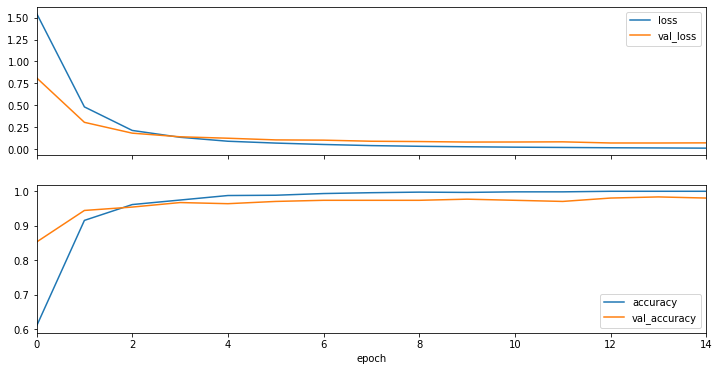

In [48]:
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim,
                activation="relu"))
model.add(Dense(hidden_dim, activation="relu"))
model.add(Dense(output_dim, activation="softmax"))

optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=15, batch_size=32)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);


分析：Adam的默认学习率是0.001，该优化算法速度往往会比SGD快，并且默参数可以很好的调节更新梯度，在很多的优化中都有很好的效果，所以使用默认参数往往就足够。

### 实验三：模型前向推理和泛化性能分析
- 对测试集进行前向理量，获得测试结果
- 对测试结果进行分析

test acc: 0.9704


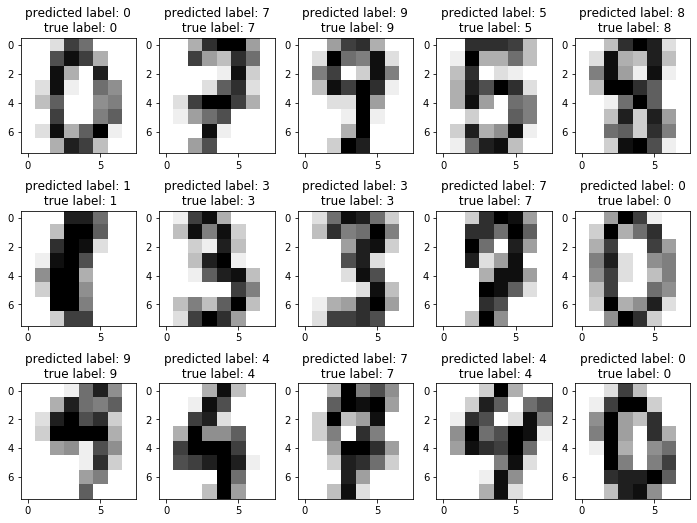

In [55]:
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12, 9))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
              cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("predicted label: %d\n true label: %d"
                 % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

### 实验四：numpy array与tensorflow tensorflow对比
上一个实验中model.predict_classes(...) 返回的是numpy array

In [58]:
predicted_labels_numpy = model.predict_classes(X_test)
predicted_labels_numpy

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3, 7, 8,
       4, 6, 1, 0, 1, 0, 5, 4, 7, 1, 6, 7, 8, 4, 3, 7, 4, 0, 5, 9, 0, 4,
       8, 7, 4, 3, 6, 3, 9, 2, 2, 5, 7, 3, 3, 8, 3, 8, 6, 6, 8, 6, 8, 5,
       0, 5, 3, 5, 0, 7, 3, 2, 9, 9, 3, 0, 2, 8, 5, 9, 2, 4, 5, 1, 7, 7,
       2, 3, 0, 4, 6, 1, 9, 7, 1, 9, 8, 3, 4, 6, 7, 8, 1, 8, 4, 0, 1, 3,
       6, 9, 5, 5, 1, 6, 0, 6, 2, 8, 9, 4, 1, 3, 4, 0, 6, 7, 7, 9, 8, 7,
       8, 2, 4, 2, 5, 4, 3, 8, 8, 9, 8, 0, 0, 6, 2, 6, 9, 0, 9, 0, 0, 8,
       7, 5, 3, 4, 0, 5, 6, 2, 6, 0, 4, 8, 7, 9, 2, 4, 3, 6, 4, 4, 5, 2,
       8, 0, 7, 7, 3, 2, 2, 9, 0, 7, 2, 1, 6, 7, 9, 1, 5, 1, 6, 4, 6, 1,
       3, 6, 1, 0, 8, 6, 5, 8, 8, 9, 1, 5, 1, 2, 6, 7, 5, 0, 1, 2, 4, 7,
       0, 7, 6, 4, 7, 6, 5, 1, 2, 5, 5, 4, 6, 1, 7, 6, 1, 8, 9, 6, 2, 8,
       5, 8, 3, 3, 9, 0, 3, 7, 9, 9, 1, 7, 0, 0, 5, 7, 3, 6, 3, 8, 6, 3,
       6, 9, 8, 3, 7, 4])

In [59]:
type(predicted_labels_numpy), predicted_labels_numpy.shape

(numpy.ndarray, (270,))

也可以获得tensorflow tensor的输出

In [60]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[9.9957174e-01, 5.8464209e-08, 6.7699506e-07, 7.4024044e-08,
        2.6275909e-05, 3.4961206e-05, 3.5264401e-04, 3.9433380e-07,
        3.1346653e-06, 1.0040740e-05],
       [5.0680562e-08, 3.9221081e-07, 2.1143561e-07, 4.0805531e-05,
        1.2121866e-06, 2.7411974e-07, 5.1911915e-08, 9.9995077e-01,
        6.8425942e-07, 5.6354470e-06],
       [3.4581582e-05, 4.3437194e-05, 5.0610502e-06, 3.9807087e-04,
        7.0817336e-03, 1.7895720e-04, 1.6996029e-07, 1.1968474e-03,
        2.8191524e-02, 9.6286964e-01],
       [4.1009003e-05, 7.9435802e-07, 1.0585695e-07, 6.1102298e-07,
        4.5018453e-07, 9.9977404e-01, 1.3678093e-04, 6.5349531e-07,
        2.0999834e-05, 2.4527117e-05],
       [1.4139686e-06, 2.1764056e-06, 2.1066551e-05, 4.5052348e-05,
        4.2510069e-06, 7.6181488e-05, 7.5227722e-06, 4.2855418e-06,
        9.9531156e-01, 4.5265271e-03]], dtype=float32)>

In [61]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([270, 10]))

使用tensorflow检查所有结查和是否为1

In [62]:
import tensorflow as tf
tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.       , 1.0000001, 1.       , 1.       , 1.0000001],
      dtype=float32)>

还可以使用tensorflow api来获取最大概率值所在位置的标签

In [63]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 7, 9, 5, 8])>

计算精度

In [64]:
accuracy_tf = tf.reduce_mean(tf.cast(predicted_labels_tf == y_test, tf.float64))
accuracy_tf

<tf.Tensor: shape=(), dtype=float64, numpy=0.9703703703703703>

喜欢用numpy也可以将tensor转换成numpy

In [65]:
accuracy_tf.numpy()

0.9703703703703703

In [66]:
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 7, 9, 5, 8])>

In [67]:
predicted_labels_tf.numpy()[:5]

array([0, 7, 9, 5, 8])

In [68]:
(predicted_labels_tf.numpy() == y_test).mean()

0.9703703703703703

### 实验五：初始化对模型的影响

研究初始化对模型性能的影响，有好的初始化和不好的初始化。
Keras对Dense layer的默认初始化方法是“glorot_uniform”：
- 所有参数随机初始化在[-scale,+scale]区间。
-  scale=$\frac{1}{\sqrt{n_{in} + n_{out}}}$
这种初始化方法对"tanh"和"relu"作为激活函数用标准SGD来训练有很好的效果。

为了验证初始化的影响，我们将两个dense层设置为"tanh"激活函数，并用gaussian分布用不同的标准差来产生不同的scale。

In [70]:
from tensorflow.keras import initializers

normal_init = initializers.TruncatedNormal(stddev=0.01)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.layers#有三层

看一下模型在训练更新参数前的初始化值

In [72]:
model.layers[0].weights

[<tf.Variable 'dense_26/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.00600229, -0.00476325,  0.00307717, ...,  0.01070479,
         -0.00400034, -0.00340873],
        [-0.00233381,  0.00023561,  0.00894215, ..., -0.01630376,
          0.00206616,  0.00639522],
        [-0.0010351 , -0.00708832,  0.00056756, ...,  0.01145899,
         -0.01235237,  0.00167793],
        ...,
        [ 0.00522072, -0.00148367,  0.0110029 , ...,  0.00078427,
          0.00486906, -0.00247767],
        [-0.0015619 ,  0.00171984, -0.00316272, ..., -0.01050979,
         -0.00815977,  0.00415378],
        [-0.00681211, -0.00738525, -0.00051109, ...,  0.00828084,
          0.00679922,  0.00588555]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [73]:
w = model.layers[0].weights[0].numpy()
w

array([[ 0.00600229, -0.00476325,  0.00307717, ...,  0.01070479,
        -0.00400034, -0.00340873],
       [-0.00233381,  0.00023561,  0.00894215, ..., -0.01630376,
         0.00206616,  0.00639522],
       [-0.0010351 , -0.00708832,  0.00056756, ...,  0.01145899,
        -0.01235237,  0.00167793],
       ...,
       [ 0.00522072, -0.00148367,  0.0110029 , ...,  0.00078427,
         0.00486906, -0.00247767],
       [-0.0015619 ,  0.00171984, -0.00316272, ..., -0.01050979,
        -0.00815977,  0.00415378],
       [-0.00681211, -0.00738525, -0.00051109, ...,  0.00828084,
         0.00679922,  0.00588555]], dtype=float32)

In [74]:
w.std()

0.0086482065

In [75]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Train on 1527 samples
Epoch 1/15
1527/1527 [==============================] - 0s 179us/sample - loss: 2.3029 - accuracy: 0.1022
Epoch 2/15
1527/1527 [==============================] - 0s 48us/sample - loss: 2.2998 - accuracy: 0.1356
Epoch 3/15
1527/1527 [==============================] - 0s 169us/sample - loss: 2.2866 - accuracy: 0.2462
Epoch 4/15
1527/1527 [==============================] - 0s 58us/sample - loss: 2.0631 - accuracy: 0.4289
Epoch 5/15
1527/1527 [==============================] - 0s 54us/sample - loss: 1.3023 - accuracy: 0.6045
Epoch 6/15
1527/1527 [==============================] - 0s 71us/sample - loss: 0.8094 - accuracy: 0.7649
Epoch 7/15
1527/1527 [==============================] - 0s 85us/sample - loss: 0.6261 - accuracy: 0.8094
Epoch 8/15
1527/1527 [==============================] - 0s 92us/sample - loss: 0.5034 - accuracy: 0.8566
Epoch 9/15
1527/1527 [==============================] - 0s 104us/sample - loss: 0.3963 - accuracy: 0.8893
Epoch 10/15
1527/1527 [=======

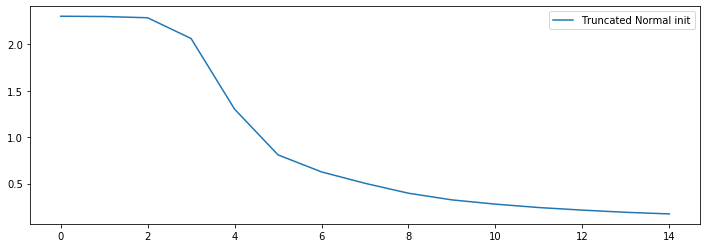

In [76]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

训练好后，模型参数发生变化

In [77]:
model.layers[0].weights

[<tf.Variable 'dense_26/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.00600229, -0.00476325,  0.00307717, ...,  0.01070479,
         -0.00400034, -0.00340873],
        [ 0.00649213, -0.02432016,  0.03570574, ...,  0.02513614,
         -0.01944202,  0.01004491],
        [-0.00416845, -0.05493826,  0.02527884, ...,  0.08605951,
         -0.07913108,  0.05740055],
        ...,
        [ 0.01315286,  0.00870395,  0.0061329 , ..., -0.02139379,
          0.07180927, -0.08003646],
        [ 0.00882134,  0.01248838, -0.01720296, ...,  0.00080226,
          0.03425543, -0.03659007],
        [ 0.00166131, -0.08106115, -0.06305156, ..., -0.02861652,
          0.03735565, -0.08307426]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.02963874, -0.00279353, -0.01352879,  0.0166767 , -0.04329192,
         0.00127379, -0.01162975, -0.02954746,  0.04353899,  0.0153252 ,
        -0.02194282, -0.04036847, -0.10709576, -0.02108939,  0.07789246,

还有其它实验做
- 更改初始化方法，查看SGD是否还能很好收敛：
  - 很小的scale `stddev=1e-4`
  - 很大的scale `stddev=1或10`
  - 把所有值初始化成零 （constant initialization)
- 对以上内容的结果做分析
- 试验其它更好的优化算法比如SGD with momentum,或者Adam等能否解决不合适初始化

Fitting with: SGD
Fitting with: RMSprop
Fitting with: Adadelta
Fitting with: Adagrad
Fitting with: Adamax
Fitting with: Adam
Fitting with: Nadam
Fitting with: SGD + Nesterov momentum


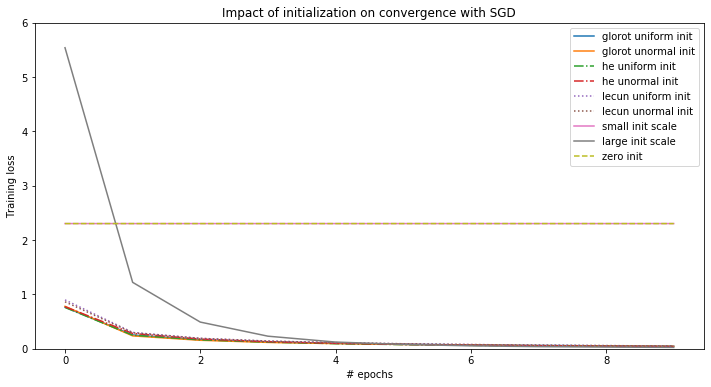

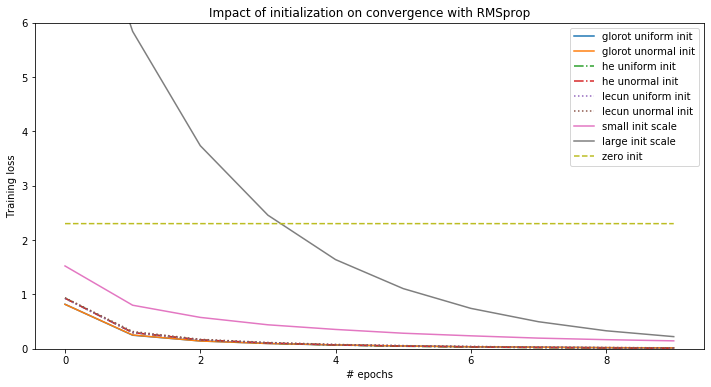

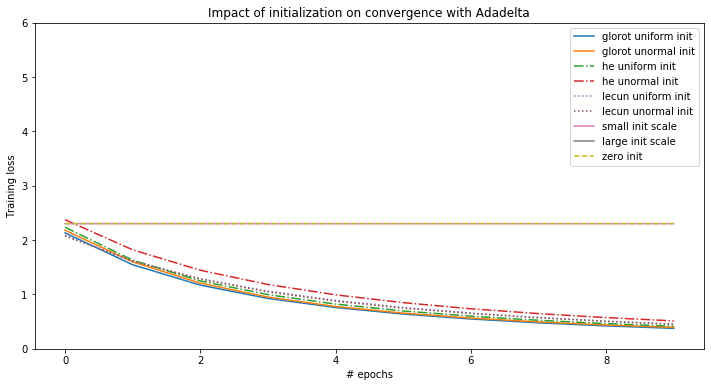

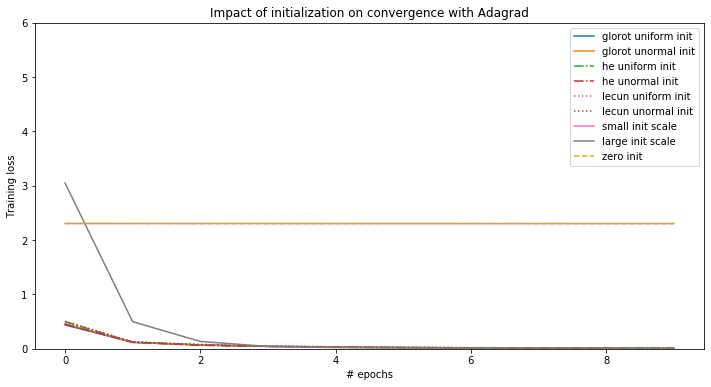

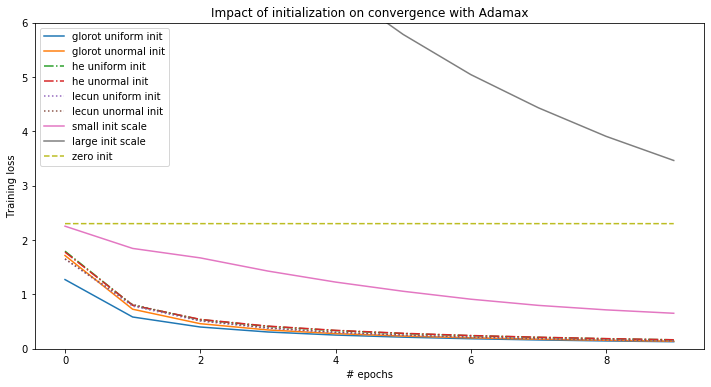

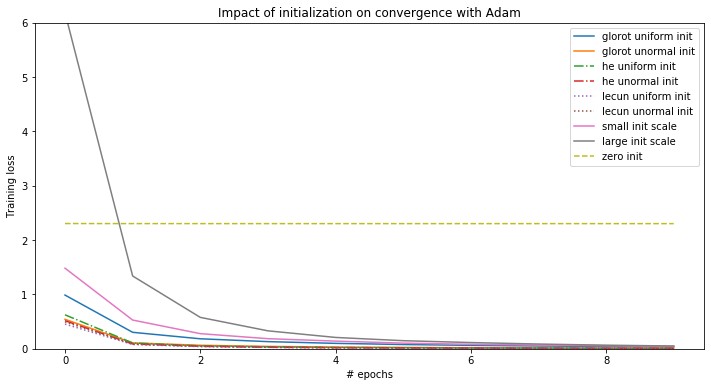

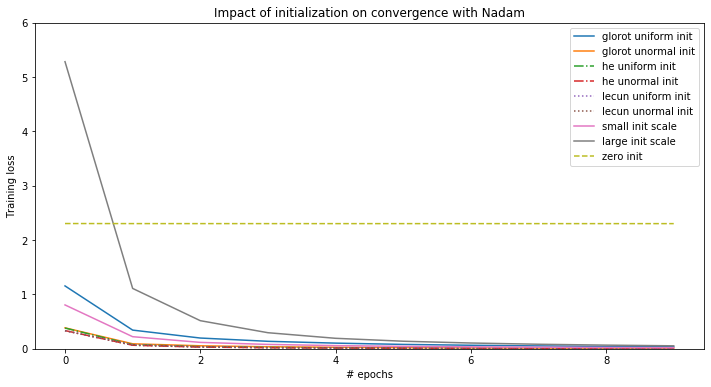

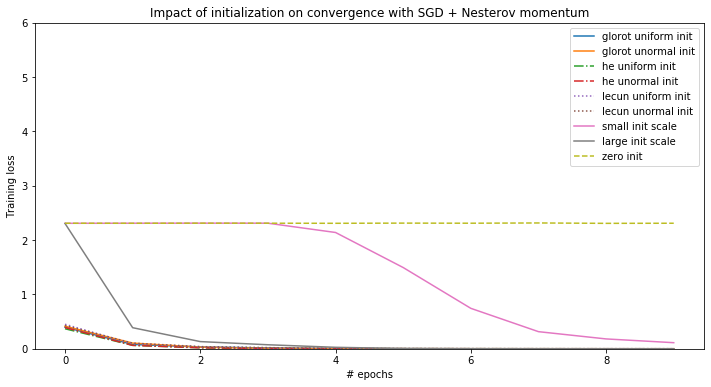

In [84]:
from tensorflow.keras import optimizers
large_scale_init = initializers.TruncatedNormal(stddev=1)
small_scale_init = initializers.TruncatedNormal(stddev=1e-3)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('RMSprop', optimizers.RMSprop()),
    ('Adadelta', optimizers.Adadelta(learning_rate=0.1)),
    ('Adagrad',optimizers.Adagrad(learning_rate=0.1)),
    ('Adamax',optimizers.Adamax()),
    ('Adam', optimizers.Adam()),
    ('Nadam', optimizers.Nadam()),
    ('SGD + Nesterov momentum', optimizers.SGD(
            lr=0.1, momentum=0.9, nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('glorot unormal init', 'glorot_normal', '-'),
    ('he uniform init', 'he_uniform', '-.'),
    ('he unormal init', 'he_normal', '-.'),
    ('lecun uniform init', 'lecun_uniform', ':'),
    ('lecun unormal init', 'lecun_normal', ':'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    print("Fitting with:", optimizer_name)
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                        kernel_initializer=init))
        model.add(Dense(hidden_dim, activation="tanh",
                        kernel_initializer=init))
        model.add(Dense(output_dim, activation="softmax",
                        kernel_initializer=init))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            epochs=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)


分析：
- 初始化是全零时，不论输入是什么，输出都是零，所以所求梯度也是零，无论什么优化算法，都是不会有改变，损失值是个常量。
- 权值中有null时，优化值不是在局部最小也不是局部最大，而是是鞍点处。
- 对于神经网络，当权重的随机初始化的范围太小，SGD很难避免低梯度区域。加动量可以提供帮助，但是特别是对于深层网络而言，可能需要花费很多时间来逃避该区域。用较大的随机值初始化权重将使输出（softmax）非常尖锐：网络对其预测值非常“自信”，即使它们是完全随机的，这导致很高初始损失值
- Glorot uniform(he uniform,lecun uniform)初始化使用的scale取决于权重矩阵的尺寸，可以获得激活值的范数，使模型的学习成为可能。
- Adam 对每个参数会计算各自的更新值，所以初始化不好也问题不大，但好的初始化会带来帮助。
所以好的模型要有以下几点：
 - 确保有合适的初始化值
 - 检查每一层的参数来避免bad layer
 - 使用Adam而不是SGD